<a href='https://akademie.datamics.com/kursliste/'>![title](bg_datamics_top.png)</a>
___
<center><em>© Datamics</em></center>
<center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Arbeiten mit eigenen Bildern

Bisher haben wir nur mit Bildern gearbeitet, die bereits passend von Keras vorbereitet wurden.

Lasst uns das Arbeiten mit einem realistischeren Datensatz erkunden.

## Der Datensatz

-----------

<div class="alert alert-block alert-info">
BITTE BEACHTE: DIESER DATENSATZ IST SEHR GROSS. ER KANN WIE IN DER VORHERIGEN LEKTION HERUNTERGELADEN WERDEN.
    
BITTE BETRACHTE DIESBEZÜGLICH DAS VIDEO DIESER LEKTION.


VERWENDE UNSEREN DATENSATZ. WIR HABEN IHN BEREITS FÜR DICH VORBEREITET!!

</div>

**ORIGINALE DATENQUELLE:**

Der Datensatz enthält zwei Verzeichnisse - Infiziert - Nicht infiziert

Und insgesamt 27,558 Bilder.

Referenz:
Dieser Datensatz stammt von der offiziellen NIH-Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

**Beachte: Wir werden mit echten Bilddateien arbeiten, NICHT mit NumPy-Arrays. Dies bedeutet, dass ein Grossteil dieser Sektion darin besteht, zu lernen, mit großen Mengen von Bilddateien zu arbeiten. Da so viele Daten nicht in den Arbeitsspeicher passen in Form von NumPy-Arrays, müssen wir unser Modell mit Batches füttern.**

### Daten herunterladen und entpacken

Lade die Bilddateien von dieser Adresse herunter und entpacke sie in das Verzeichnis, in dem sich dieses Notebook befindet.

https://datamics.com/download/cell_images/

### Daten visualisieren


-------
Lasst uns einen genaueren Blick auf die Daten werfen.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technisch betrachtet nicht notwendig in der neuesten Version von Jupyter
%matplotlib inline

**ÜBERPRÜFE DREIMAL, WO DEINE DATEN GESPEICHERT UND ENTPACKT WURDEN. BETRACHTE BITTE VOR DEM POSTEN EINER FRAGE IM FORUM DAS VIDEO.**

Ermittele zuerst dein Arbeitsverzeichnis und erzeuge dann den Pfad zu den Daten wie hier gezeigt:

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Successfully mounted and found data directory: /content/drive/My Drive/dl-udemy/cell_images
Contents of the data directory:
test
train


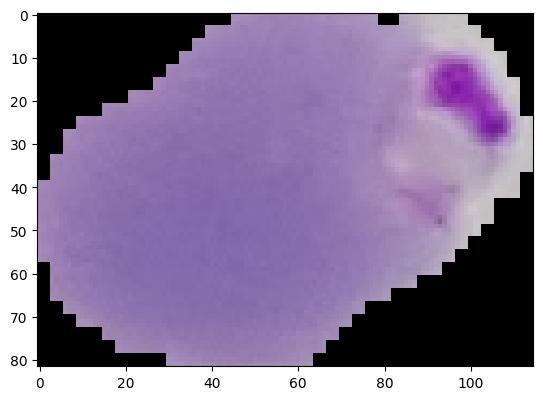

In [11]:
# prompt: mount google drive and read from /content/drive/My Drive/dl-udemy/cell_images store path in my_data_dir and read from this path!

# Define the data directory
my_data_dir = '/content/drive/My Drive/dl-udemy/cell_images'

# Check if the directory exists
if not os.path.exists(my_data_dir):
    print(f"Error: Directory '{my_data_dir}' not found.")
else:
    print(f"Successfully mounted and found data directory: {my_data_dir}")

    # Example: List the contents of the directory
    print("Contents of the data directory:")
    for item in os.listdir(my_data_dir):
        print(item)

    # Example: Read an image (replace with your image file)
    image_path = os.path.join( '/content/drive/My Drive/dl-udemy/cell_images/test/parasitized', 'C189P150ThinF_IMG_20151203_141004_cell_74.png')
    if os.path.exists(image_path):
      img = imread(image_path)
      plt.imshow(img)
      plt.show()
    else:
      print(f"Error: Image '{image_path}' not found.")


In [12]:
# my_data_dir = os.path.join('/content', 'cell_images')

In [13]:
# STELLE SICHER, DASS DIE UNTERVERZEICHNISSE 'test' UND 'train' KORREKT GEFUNDEN WERDEN:
os.listdir(my_data_dir)

['test', 'train']

In [14]:
test_path = os.path.join(my_data_dir, 'test')
train_path = os.path.join(my_data_dir, 'train')

In [15]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [16]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(os.path.join(train_path, 'parasitized'))[0]

'C97P58ThinF_IMG_20150917_151903_cell_25.png'

In [18]:
para_cell = os.path.join(train_path, 'parasitized', 'C100P61ThinF_IMG_20150918_144104_cell_162.png')

In [19]:
para_img= imread(para_cell)

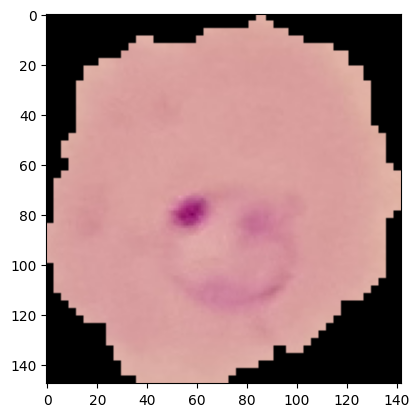

In [20]:
plt.imshow(para_img)

In [21]:
para_img.shape

(148, 142, 3)

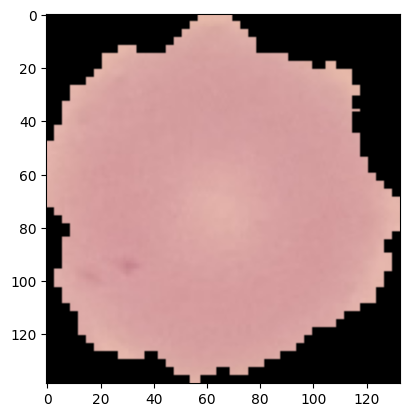

In [22]:
unifected_cell_path = os.path.join(train_path, 'uninfected', os.listdir(os.path.join(train_path, 'uninfected'))[0])
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

**Lasst uns überprüfen, wie viele Bilder es gibt.**

In [23]:
len(os.listdir(os.path.join(train_path, 'parasitized')))

12480

In [24]:
len(os.listdir(os.path.join(train_path, 'uninfected')))

12490

**Lasst uns die durchschnittliche Dimension der Bilder bestimmen.**

In [25]:
para_img.shape

(148, 142, 3)

In [26]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_path, 'uninfected')):

    img = imread(os.path.join(test_path, 'uninfected', image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [29]:
# sns.jointplot(dim1,dim2)

In [30]:
np.mean(dim1)

np.float64(130.92538461538462)

In [31]:
np.mean(dim2)

np.float64(130.75)

In [32]:
image_shape = (130,130,3)

## Die Daten für das Modell vorbereiten

Wir können diese große Menge von Daten nicht auf einmal in den Arbeitsspeicher laden. Wir können aber von Keras bereitgestellte Funktionen verwenden, um die Daten automatisch zu verarbeiten, damit einen Fluss von Batches aus einem Verzeichnis erzeugen und ausserdem die Bilder bearbeiten.

### Bildbearbeitung

Es ist normalerweise eine gute Idee, die Bilder mit Rotation, Größenanpassung und Skalierung zu modifizieren, damit das Modell robuster gegenüber im Datensatz nicht enthaltenen Bildern wird. Wir können dazu den automatischen **ImageDataGenerator** verwenden. Wirf einen Blick in die Dokumentation für eine vollständige Liste aller verfügbaren Parameter!

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
# help(ImageDataGenerator)

In [35]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

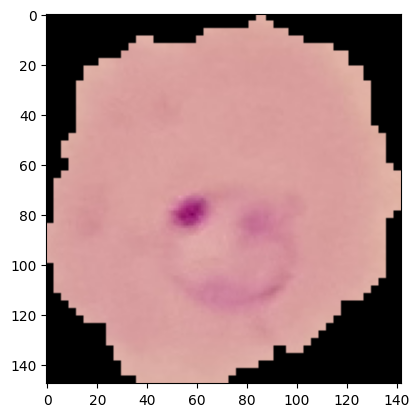

In [36]:
plt.imshow(para_img)

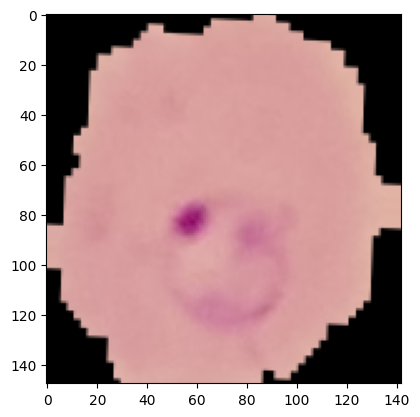

In [37]:
plt.imshow(image_gen.random_transform(para_img))

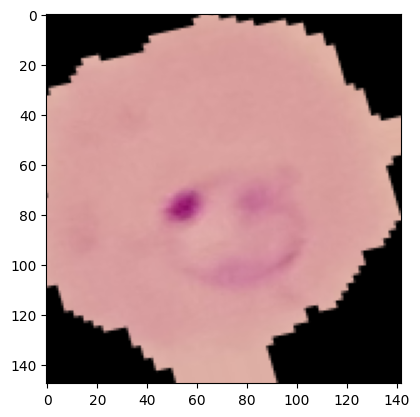

In [38]:
plt.imshow(image_gen.random_transform(para_img))

### Bearbeitete Bilder aus einem Verzeichnis generieren

Für die Verwendung von .flow_from_directory musst du die Bilder in Unterverzeichnissen organisieren. Dies ist verpflichtend, sonst funktioniert die Methode nicht. Die Verzeichnisse sollten nur Bilder einer Klasse enthalten, also ein Verzeichnis per Bildklasse.

Notwendige Struktur:

* Bildverzeichnis
    * Klasse 1
        * 0.jpg
        * 1.jpg
        * ...
    * Klasse 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Klasse n

In [39]:
image_gen.flow_from_directory(train_path)

Found 24968 images belonging to 2 classes.


In [40]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Modell erzeugen

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [42]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

## Früh terminieren

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Modell trainieren

In [46]:
# help(image_gen.flow_from_directory)

In [47]:
batch_size = 16

In [48]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24968 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 20435s 13s/step - accuracy: 0.7739 - loss: 0.4633 - val_accuracy: 0.9388 - val_loss: 0.2004
Epoch 2/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 168s 107ms/step - accuracy: 0.9363 - loss: 0.1997 - val_accuracy: 0.9458 - val_loss: 0.1774
Epoch 3/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 166s 106ms/step - accuracy: 0.9448 - loss: 0.1800 - val_accuracy: 0.9492 - val_loss: 0.1653
Epoch 4/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 166s 106ms/step - accuracy: 0.9482 - loss: 0.1706 - val_accuracy: 0.9469 - val_loss: 0.1618
Epoch 5/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 165s 106ms/step - accuracy: 0.9504 - loss: 0.1594 - val_accuracy: 0.9469 - val_loss: 0.1558
Epoch 6/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 166s 106ms/step - accuracy: 0.9528 - loss: 0.1556 - val_accuracy: 0.9512 - val_loss: 0.1516
Epoch 7/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.9535 - loss: 0.1548 - val_accuracy: 0.9350 - val_loss: 0.1765
Epoch 8/20
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - ac

In [55]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.keras')

# Modell evaluieren

In [56]:
losses = pd.DataFrame(model.history.history)

<Axes: >

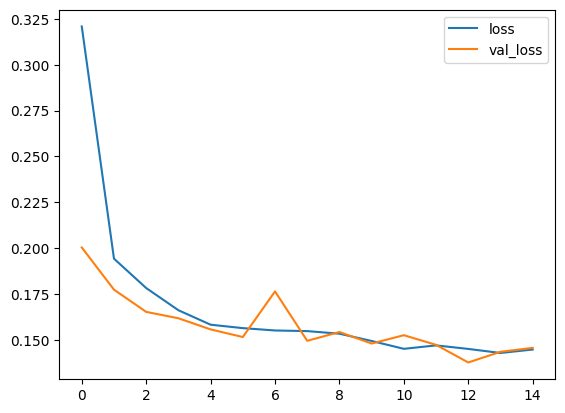

In [57]:
losses[['loss','val_loss']].plot()

In [58]:
model.metrics_names

['loss', 'compile_metrics']

In [60]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9321 - loss: 0.1758


[0.1386275291442871, 0.9515384435653687]

In [61]:
from tensorflow.keras.preprocessing import image

In [63]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step


In [64]:
pred_probabilities

array([[3.8966674e-03],
       [5.1661662e-04],
       [1.2541235e-02],
       ...,
       [9.8231858e-01],
       [9.9191636e-01],
       [9.4138974e-01]], dtype=float32)

In [65]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [66]:
predictions = pred_probabilities > 0.5

In [67]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [70]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1201,   99],
       [  39, 1261]])

# Bild vorhersagen

In [71]:
# Your file path will be different!
para_cell

'/content/drive/My Drive/dl-udemy/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [72]:
my_image = image.load_img(para_cell,target_size=image_shape)

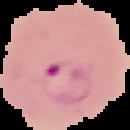

In [73]:
my_image

In [74]:
type(my_image)

PIL.Image.Image

In [75]:
my_image = image.img_to_array(my_image)

In [76]:
type(my_image)

numpy.ndarray

In [77]:
my_image.shape

(130, 130, 3)

In [78]:
my_image = np.expand_dims(my_image, axis=0)

In [79]:
my_image.shape

(1, 130, 130, 3)

In [80]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


array([[0.]], dtype=float32)

In [81]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [82]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

# Gut gemacht!

In [83]:
from google.colab import files
files.download('malaria_detector.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>